In [1]:
import cv2
import numpy as npD
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:

batch_size = 100
img_height = 224
img_width = 224


In [3]:

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
'data\\train\\',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 240 files belonging to 2 classes.


In [4]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data\\test\\',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 52 files belonging to 1 classes.


In [5]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 'data\\val\\',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [6]:
class_names = training_ds.class_names

print(class_names)

['Accident', 'Non Accident']


In [7]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

img_shape = (img_height, img_width, 3)

In [8]:
print(img_shape)

(224, 224, 3)


In [9]:

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'sigmoid')
])


In [10]:
print(base_model)

<Functional name=mobilenetv2_1.00_224, built=True>


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 100)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.4967 - loss: 1.3056 - val_accuracy: 0.5714 - val_loss: 0.6902
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7867 - loss: 0.5308 - val_accuracy: 0.5408 - val_loss: 0.9690
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7133 - loss: 0.4794 - val_accuracy: 0.5612 - val_loss: 1.0354
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8062 - loss: 0.3634 - val_accuracy: 0.5204 - val_loss: 0.8815
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8817 - loss: 0.2655 - val_accuracy: 0.5612 - val_loss: 1.4179
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.9383 - loss: 0.1978 - val_accuracy: 0.5612 - val_loss: 1.0407
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9679 - loss: 0.1462 - val_accuracy: 0.5510 - val_loss: 1.6099
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9667 - loss: 0.1046 - val_accuracy: 0.5918 - val_loss: 1.3330


In [13]:
model.save("AccidentDetectionModel(E-10).keras")

In [14]:
print(max(history.history['accuracy']))
print(max(history.history['val_accuracy']))

1.0
0.6020408272743225


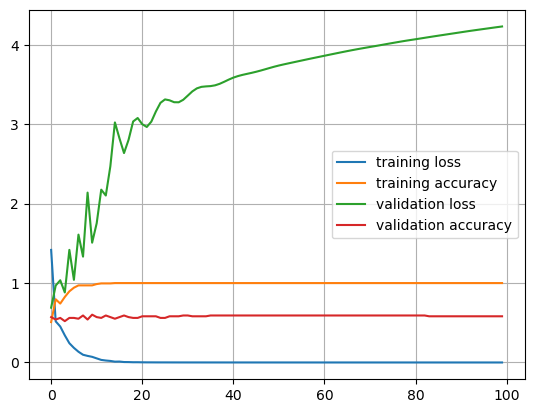

In [15]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()


plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

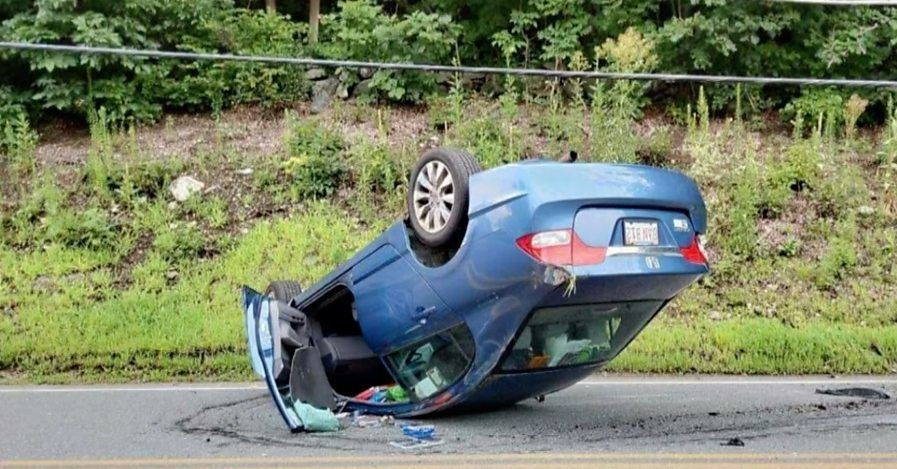

In [16]:
from IPython.display import Image
file_path = r'final\after testing\test1.PNG'
f=r'final/before testing/_108317050_p07kmppq.jpg'
Image(filename=f)


In [17]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    #print(img_array)
    #print(img_batch)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    print(prediction)
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")


In [18]:
def print_ans(label,image):
  f=0
  for i in label:
    if i=="Accident Detected":
      f=1
  if f:
    print("Accident Detected")
    print(plt.imshow(image[len(image)//2]))
  else:
    print("No Accident Detected")
    print(plt.imshow(image[len(image)//2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[1 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[[0 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
[[0 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[0 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[1 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[1 0]]
Accident Detected
AxesImage(size=(224, 224))


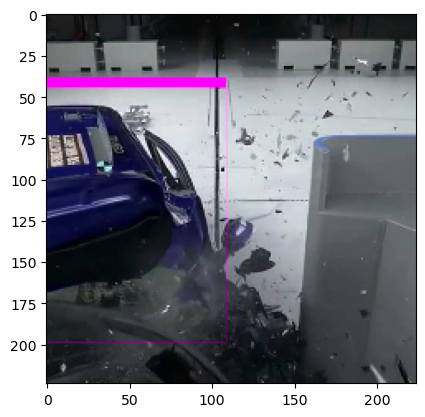

In [21]:
import cv2
import tensorflow as tf

image = []
label = []

c = 0
cap = cv2.VideoCapture('final/after testing/rcollisionfinal - .mp4')
while True:
    grabbed, frame = cap.read()
    #print(frame,grabbed)
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    #print(label)
    c += 1
print_ans(label,image)
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[1 0]]
0
No Accident Detected
AxesImage(size=(224, 224))


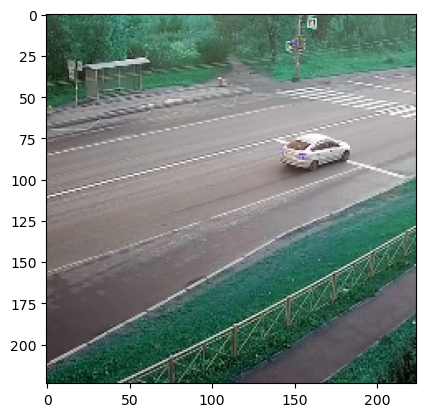

In [24]:
image = []
label = []

c = 0
cap = cv2.VideoCapture('data/val/Non Accident/test25_5.jpg')
while True:
    grabbed, frame = cap.read()
    #print(frame,grabbed)
    if not grabbed:
        break

    if c %30 == 0:
        #print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (224, 224), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    print(c)
    c += 1
print_ans(label,image)
cap.release()